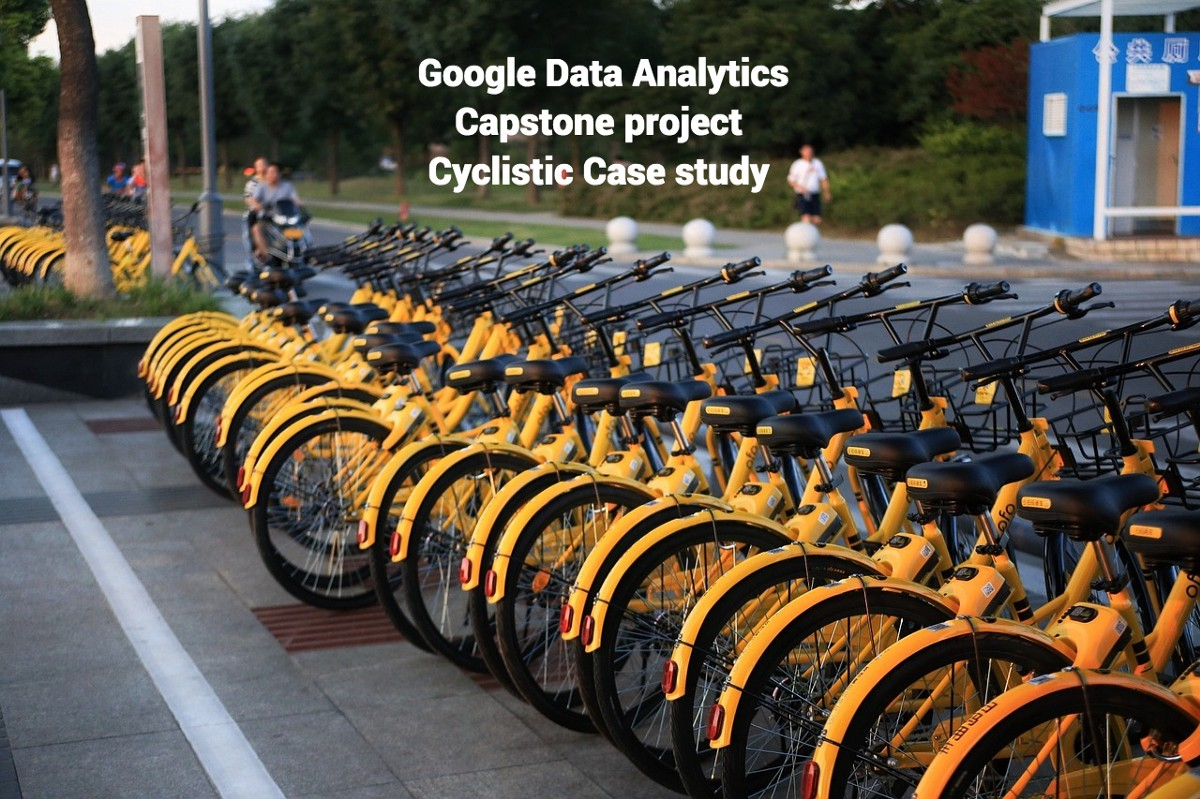

image source : https://medium.com/@aissa.ai3/google-data-analytics-capstone-cyclistic-case-study-e0ba0e616d63

<h1 style="font-family:verdana;"> <center>  The Mission Statement 🎯 </center> </h1>


The bike sharing company wants to analyze their user data to find the main differences in behaviour between their two types of users, the “casual” who pays for each ride and the annual member who pays a yearly subscription to the service.

<h1 style="font-family:verdana;"> <center>  The Challenge 🔦 </center> </h1>


How do members and casual riders use Cyclistic bikes differently?

<h1 style="font-family:verdana;"> <center>  Project Purpose ✨ </center> </h1>

Support the decision-making process behind supporting or opposing a marketing stategy that attempts to convert **casuals** into **members**.

<h1 style="font-family:verdana;"> <center>  Importing Libraries 📚 </center> </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="font-family:verdana;"> <center>  Loading the Dataset 📖 </center> </h1>


In [2]:
df_1_year = pd.read_csv("../input/cyclistic-bike-share-user-dataset-1-year/df_1_year.csv") 

<h1 style="font-family:verdana;"> <center>  Getting basic ideas of the Dataset 🎆</center> </h1>

In [3]:
df_1_year

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235882,823483,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.74,-87.68,41.75,-87.68,member,2022,7,23.916667,2022-07-01 00:00:00
3235883,823484,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.87,-87.66,41.87,-87.68,member,2022,7,5.200000,2022-07-01 00:00:00
3235884,823485,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.95,-87.64,41.95,-87.65,member,2022,7,5.400000,2022-07-01 00:00:00
3235885,823486,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.88,-87.63,41.87,-87.63,member,2022,7,5.450000,2022-07-01 00:00:00


In [4]:
df_1_year.isnull().sum()

Unnamed: 0                 0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    505434
start_station_id      505432
end_station_name      540763
end_station_id        540763
start_lat                  0
start_lng                  0
end_lat                  218
end_lng                  218
member_casual              0
Year                       0
Month                      0
ride_length                0
Year-Month                 0
dtype: int64

In [5]:
df_1_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235887 entries, 0 to 3235886
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  Year                int64  
 15  Month               int64  
 16  ride_length         float64
 17  Year-Month          object 
dtypes: float64(5), int64(3), object(10)
memory usage: 444.4+ MB


<h1 style="font-family:verdana;"> <center>  Data Visualizations 📈</center> </h1>



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Ride Lengths')

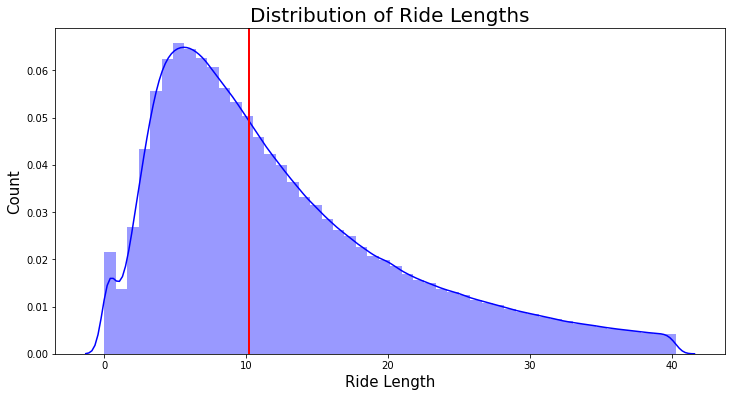

In [6]:
plt.figure(figsize=(12,6))
median_age = df_1_year['ride_length'].median()
sns.distplot(df_1_year['ride_length'], color= 'b', kde =True)
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Age')
plt.xlabel('Ride Length',fontdict={'fontsize':15})
plt.ylabel('Count',fontdict={'fontsize':15})
plt.title("Distribution of Ride Lengths",fontdict={'fontsize':20})


Ride Length for users are generally 0 to 40 mins. The median ride length is around 10 mins. 

**Converting Year-Month column to datetime date type**

In [7]:
df_1_year['Year-Month'] = pd.to_datetime(df_1_year['Year-Month'])

**Dividing Dataset based on user type member and casual type dataset**

In [8]:
df_1_year_member = df_1_year[df_1_year['member_casual'] == 'member']
df_1_year_casual = df_1_year[df_1_year['member_casual'] == 'casual']

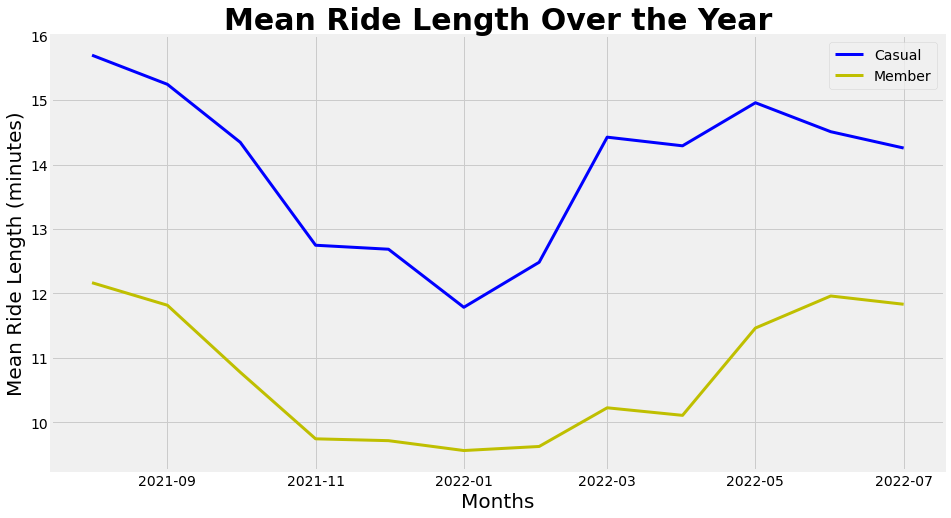

In [9]:
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.plot(df_1_year_casual.groupby('Year-Month').ride_length.mean().index,
          df_1_year_casual.groupby('Year-Month').ride_length.mean().values,label='Casual',
           color='b',linewidth=3)
plt.plot(df_1_year_member.groupby('Year-Month').ride_length.mean().index,
          df_1_year_member.groupby('Year-Month').ride_length.mean().values,label='Member',
          color='y',linewidth=3)
plt.xlabel('Months',fontdict={'fontsize': 20})
plt.ylabel('Mean Ride Length (minutes)',fontdict={'fontsize': 20})
plt.title('Mean Ride Length Over the Year',fontweight="bold",fontdict={'fontsize': 30})
plt.grid(True)
plt.legend()

Casuals generally used Cyclistic bike for longer time compaire to member type users over the year. The different in bike riding time is around 4 mins.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Types of bikes used by member and casual type users')

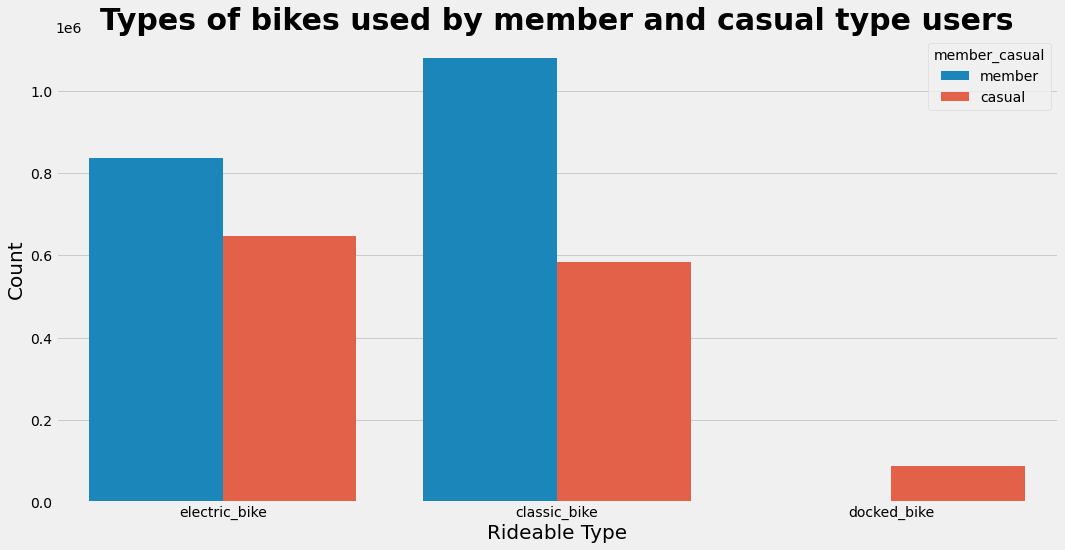

In [10]:
plt.figure(figsize=(16,8))
sns.countplot(df_1_year.rideable_type, hue=df_1_year.member_casual)
plt.xlabel('Rideable Type',fontdict={'fontsize': 20})
plt.ylabel('Count',fontdict={'fontsize': 20})
plt.title('Types of bikes used by member and casual type users',
          fontweight="bold",fontdict={'fontsize': 30})

Electric and Classic bikes are more often used by memeber type users. While docked bikes are only used by casual type users.

Text(0.5, 0, 'Rideable Type')

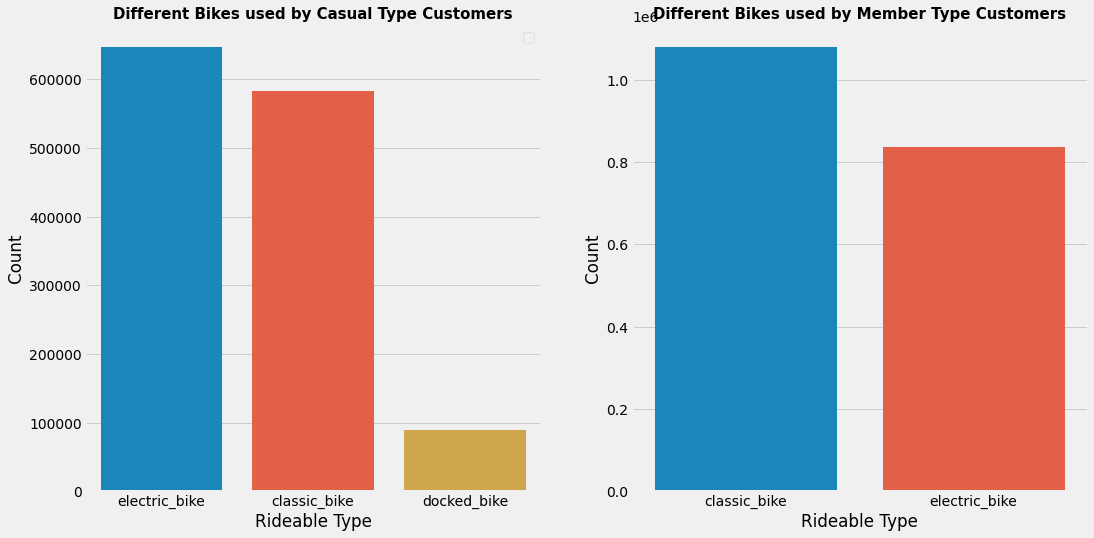

In [11]:
fig, axes = plt.subplots(1, 2,figsize=(16,8))
sns.barplot(x=df_1_year_casual.rideable_type.value_counts().index
            ,y=df_1_year_casual.rideable_type.value_counts().values,ax=axes[0])
axes[0].set_title("Different Bikes used by Casual Type Customers",
                  fontweight="bold",fontdict={'fontsize': 15})
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Rideable Type')
axes[0].legend()
sns.barplot(x=df_1_year_member.rideable_type.value_counts().index
            ,y=df_1_year_member.rideable_type.value_counts().values,ax=axes[1])
axes[1].set_title("Different Bikes used by Member Type Customers",
                  fontweight="bold",fontdict={'fontsize': 15})
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Rideable Type')

Casual riders used electric bikes more than classic bikes where as member riders used calssic bikes more than electric bikes.

**Latitude and Longitude datapoint are separated and plotted in map using Tablue**

In [12]:
df_lat_lng = df_1_year[['start_lat','start_lng','end_lat','end_lng','Year-Month','member_casual']]

In [13]:
df_lat_lng.head()

,start_lat,start_lng,end_lat,end_lng,Year-Month,member_casual
0,41.77,-87.68,41.77,-87.68,2021-08-01,member
1,41.77,-87.68,41.77,-87.63,2021-08-01,member
2,41.95,-87.65,41.97,-87.66,2021-08-01,member
3,41.81,-87.61,41.80,-87.60,2021-08-01,member
4,41.77,-87.62,41.81,-87.61,2021-08-01,member


In [14]:
df_lat_lng.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)





<h1 style="font-family:verdana;"> <b><center>  Number of times bike parked in start and end stations (Aug,2021 - July,2022)</center> </b></h1>

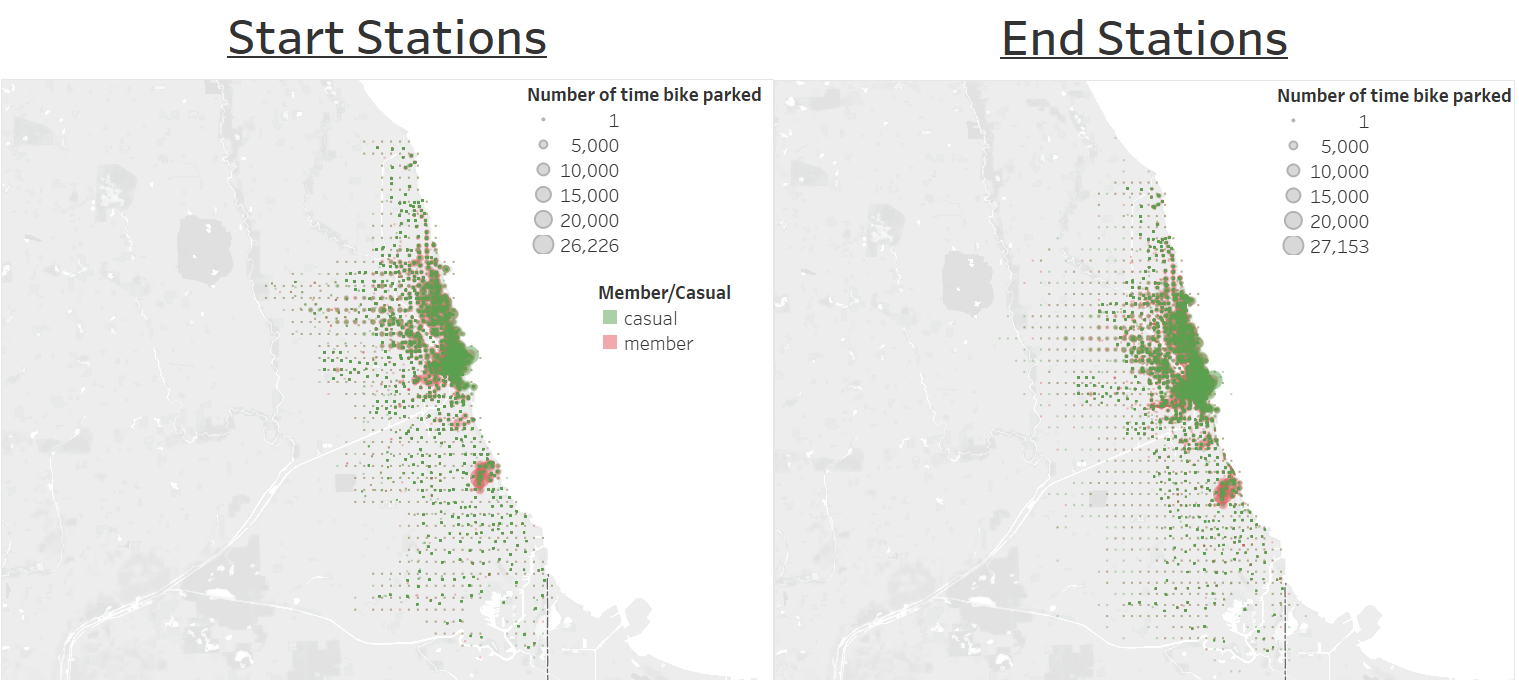

Casual riders bike rides the mostly agglomerated in the coastal areas of Chicago, USA.
Whereas, member type users rides are scatterd through out the map.

In [15]:
df_1_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235887 entries, 0 to 3235886
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          object        
 4   ended_at            object        
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
 14  Year                int64         
 15  Month               int64         
 16  ride_length         float64       
 17  Year-Month          datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(9)
memory usage: 444.4+ MB


**Creating weekdays/weekend columns from Day_of_week**

In [16]:
df_1_year['Day_of_week'] = pd.DatetimeIndex(df_1_year['started_at']).weekday

Tuesdays are assinged the value 3. Weekdays and weekends the separated accordingly

In [17]:
df_1_year_weekend = df_1_year[(df_1_year['Day_of_week'] == 5) | (df_1_year['Day_of_week'] == 6)]

In [18]:
df_1_year_weekdays = df_1_year[(df_1_year['Day_of_week'] == 1) | (df_1_year['Day_of_week'] == 2) |
                               (df_1_year['Day_of_week'] == 3) | (df_1_year['Day_of_week'] == 4) |
                               (df_1_year['Day_of_week'] == 7)]

In [19]:
data1 = df_1_year_weekdays.member_casual.value_counts()
data2 = df_1_year_weekend.member_casual.value_counts()

<h1 style="font-family:verdana;"> <b><center> Member and Casual Type Users in Weekdays and Weekends </center> </b></h1>

Text(0.5, 1.0, 'Users on weekends')

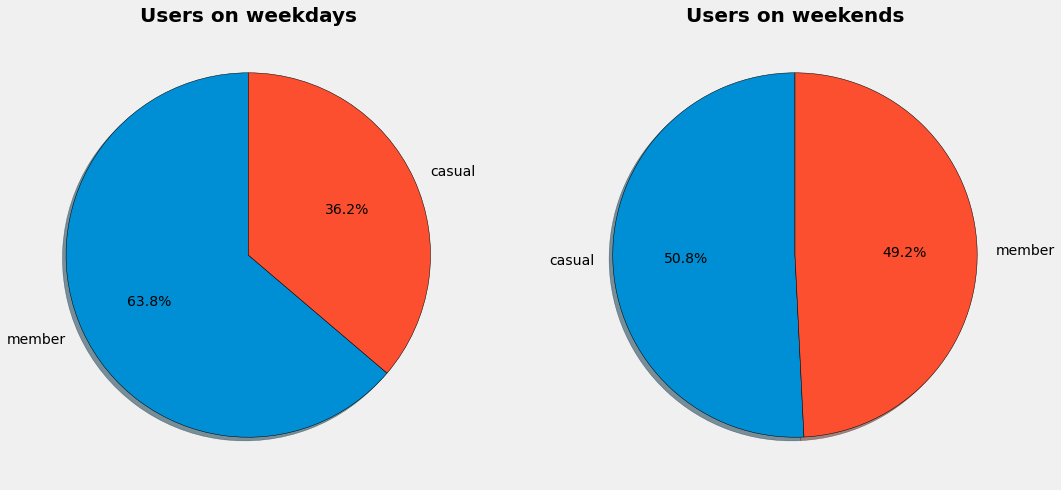

In [20]:
fig, axes = plt.subplots(1, 2,figsize=(16,8))
axes[0].pie(data1,labels=data1.index,shadow=True,startangle=90,autopct='%1.1f%%',
         wedgeprops={'edgecolor':'black'})
axes[0].set_title("Users on weekdays",
                  fontweight="bold",fontdict={'fontsize': 20})
axes[1].pie(data2,labels=data2.index,shadow=True,startangle=90,autopct='%1.1f%%',
         wedgeprops={'edgecolor':'black'})
axes[1].set_title("Users on weekends",
                  fontweight="bold",fontdict={'fontsize': 20})


Casuals riders used Cyclistics bikes more in weekends compair to weekdays.

**I will update this notebook.**

**Feedbacks are welcomed.**
